# Markov Graph Generation

In [69]:
import firebase_admin
from firebase_admin import credentials, firestore
from firebase_admin import db

In [58]:
# Fetch the service account key JSON file contents
cred = credentials.Certificate('secrets/firebase_service_credentials.json')
firebase_admin.initialize_app(cred)

ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [107]:
# Reference Firestore
db = firestore.client()

# Access a collection (e.g., 'userData')
docs = db.collection('userData').stream()

In [108]:
doc_id = "aZsD4SlJGp4HkKVkD012"
# Print the documents
for doc in docs:
    if (doc.id == doc_id):
        sample_doc = doc.to_dict()
        break

In [109]:
sample_doc

{'documents': [{'createdAt': '2025-03-25T16:11:27.645Z',
   'type': 'interaction',
   'metadata': {'name': 'Video'},
   'sourceState': '/'},
  {'createdAt': '2025-03-25T16:11:27.662Z',
   'type': 'self_loop',
   'metadata': {'urlChange': False},
   'sourceState': '/'},
  {'createdAt': '2025-03-25T16:11:27.664Z',
   'type': 'state_change',
   'metadata': {'destinationState': '/watch'},
   'sourceState': '/'},
  {'createdAt': '2025-03-25T16:11:39.764Z',
   'type': 'interaction',
   'metadata': {'name': 'Watch Page Recommended Video'},
   'sourceState': '/watch'},
  {'createdAt': '2025-03-25T16:11:39.779Z',
   'type': 'self_loop',
   'metadata': {'urlChange': True},
   'sourceState': '/watch'},
  {'createdAt': '2025-03-25T16:11:46.822Z',
   'type': 'interaction',
   'metadata': {'name': 'YouTube Logo'},
   'sourceState': '/watch'},
  {'createdAt': '2025-03-25T16:11:46.834Z',
   'type': 'state_change',
   'metadata': {'destinationState': '/'},
   'sourceState': '/watch'},
  {'createdAt': '

In [110]:
documents = sample_doc["documents"]

In [ ]:
documents

[{'createdAt': '2025-03-25T16:11:27.645Z',
  'type': 'interaction',
  'metadata': {'name': 'Video'},
  'sourceState': '/'},
 {'createdAt': '2025-03-25T16:11:27.662Z',
  'type': 'self_loop',
  'metadata': {'urlChange': False},
  'sourceState': '/'},
 {'createdAt': '2025-03-25T16:11:27.664Z',
  'type': 'state_change',
  'metadata': {'destinationState': '/watch'},
  'sourceState': '/'},
 {'createdAt': '2025-03-25T16:11:39.764Z',
  'type': 'interaction',
  'metadata': {'name': 'Watch Page Recommended Video'},
  'sourceState': '/watch'},
 {'createdAt': '2025-03-25T16:11:39.779Z',
  'type': 'self_loop',
  'metadata': {'urlChange': True},
  'sourceState': '/watch'},
 {'createdAt': '2025-03-25T16:11:46.822Z',
  'type': 'interaction',
  'metadata': {'name': 'YouTube Logo'},
  'sourceState': '/watch'},
 {'createdAt': '2025-03-25T16:11:46.834Z',
  'type': 'state_change',
  'metadata': {'destinationState': '/'},
  'sourceState': '/watch'},
 {'createdAt': '2025-03-25T16:11:49.468Z',
  'type': 'inte

In [145]:
import pandas as pd

In [146]:
df = pd.DataFrame(documents)

In [147]:
df

,createdAt,type,metadata,sourceState
0,2025-03-25T16:11:27.645Z,interaction,{'name': 'Video'},/
1,2025-03-25T16:11:27.662Z,self_loop,{'urlChange': False},/
2,2025-03-25T16:11:27.664Z,state_change,{'destinationState': '/watch'},/
3,2025-03-25T16:11:39.764Z,interaction,{'name': 'Watch Page Recommended Video'},/watch
4,2025-03-25T16:11:39.779Z,self_loop,{'urlChange': True},/watch
5,2025-03-25T16:11:46.822Z,interaction,{'name': 'YouTube Logo'},/watch
6,2025-03-25T16:11:46.834Z,state_change,{'destinationState': '/'},/watch
7,2025-03-25T16:11:49.468Z,interaction,{'name': 'Side Navigation Button'},/
8,2025-03-25T16:11:50.073Z,state_change,{'destinationState': '/shorts/_Z1dMmGBBCo'},/
9,2025-03-25T16:11:53.686Z,self_loop,{'urlChange': False},/shorts


In [148]:
import networkx as nx
G = nx.DiGraph()

In [149]:
df['createdAt'] = df['createdAt'].apply(lambda x: pd.to_datetime(x.split('GMT')[0].strip()))

In [150]:
df

,createdAt,type,metadata,sourceState
0,2025-03-25 16:11:27.645000+00:00,interaction,{'name': 'Video'},/
1,2025-03-25 16:11:27.662000+00:00,self_loop,{'urlChange': False},/
2,2025-03-25 16:11:27.664000+00:00,state_change,{'destinationState': '/watch'},/
3,2025-03-25 16:11:39.764000+00:00,interaction,{'name': 'Watch Page Recommended Video'},/watch
4,2025-03-25 16:11:39.779000+00:00,self_loop,{'urlChange': True},/watch
5,2025-03-25 16:11:46.822000+00:00,interaction,{'name': 'YouTube Logo'},/watch
6,2025-03-25 16:11:46.834000+00:00,state_change,{'destinationState': '/'},/watch
7,2025-03-25 16:11:49.468000+00:00,interaction,{'name': 'Side Navigation Button'},/
8,2025-03-25 16:11:50.073000+00:00,state_change,{'destinationState': '/shorts/_Z1dMmGBBCo'},/
9,2025-03-25 16:11:53.686000+00:00,self_loop,{'urlChange': False},/shorts


In [151]:
states = df.sourceState.unique()
states

array(['/', '/watch', '/shorts'], dtype=object)

In [ ]:
df_deduplicated = df.loc[df['sourceState'].shift() != df['sourceState']]

# Reset the index if needed
df_deduplicated = df_deduplicated.reset_index(drop=True)

# Display or save the result
print(list(df_deduplicated.sourceState))
connections = list(df_deduplicated.sourceState)

['/', '/watch', '/', '/shorts', '/']


In [153]:
G.add_nodes_from(states)

In [154]:
G.nodes

NodeView(('/', '/watch', '/shorts'))

In [ ]:
edges = []
for i in range(1, len(connections)):
    edges.append((connections[i-1], connections[i]))

In [156]:
edges

[('/', '/watch'), ('/watch', '/shorts')]

In [157]:
G.add_edges_from(edges)

In [158]:
G.edges

OutEdgeView([('/', '/watch'), ('/watch', '/shorts')])

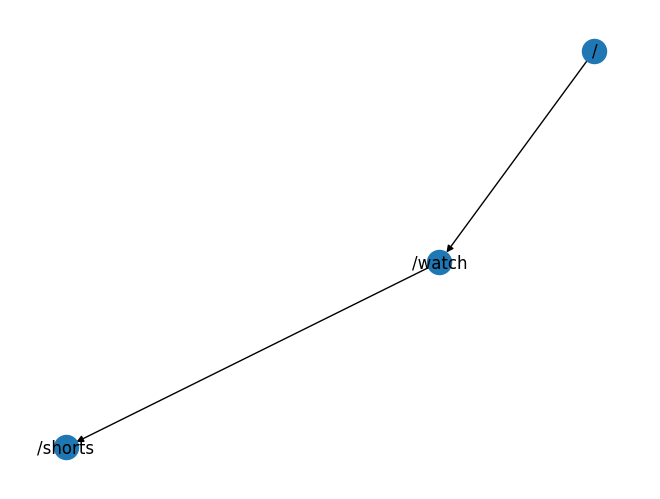

In [159]:
nx.draw(G, with_labels=True)